In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
FILEPATH='/kaggle/input/playground-series-s4e6'

#READ THE DATASET
df_train=pd.read_csv(os.path.join(FILEPATH,'train.csv'))
df_test=pd.read_csv(os.path.join(FILEPATH,'test.csv'))

#COLUMNS
COLS = df_train.columns.to_list()
num_cols=df_train.select_dtypes(include=['int64','float64']).columns.to_list()
target_col='Target'

In [4]:
# Data set analysis....
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
df_train.isna().sum() # No null values in the dataset...


id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [5]:
#Data-visualisations........
X= df_train.drop([f'{target_col}'],axis=1).reset_index(drop=True)
y = df_train[[f'{target_col}']].reset_index(drop=True)
y['Target']= y['Target'].map({'Dropout':0,'Enrolled':1,'Graduate':3})

In [6]:
COL_VISUALS = [col for col in num_cols if X[col].nunique() > 5 and X[col].std() > 0]

In [7]:
len(COL_VISUALS)

29

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

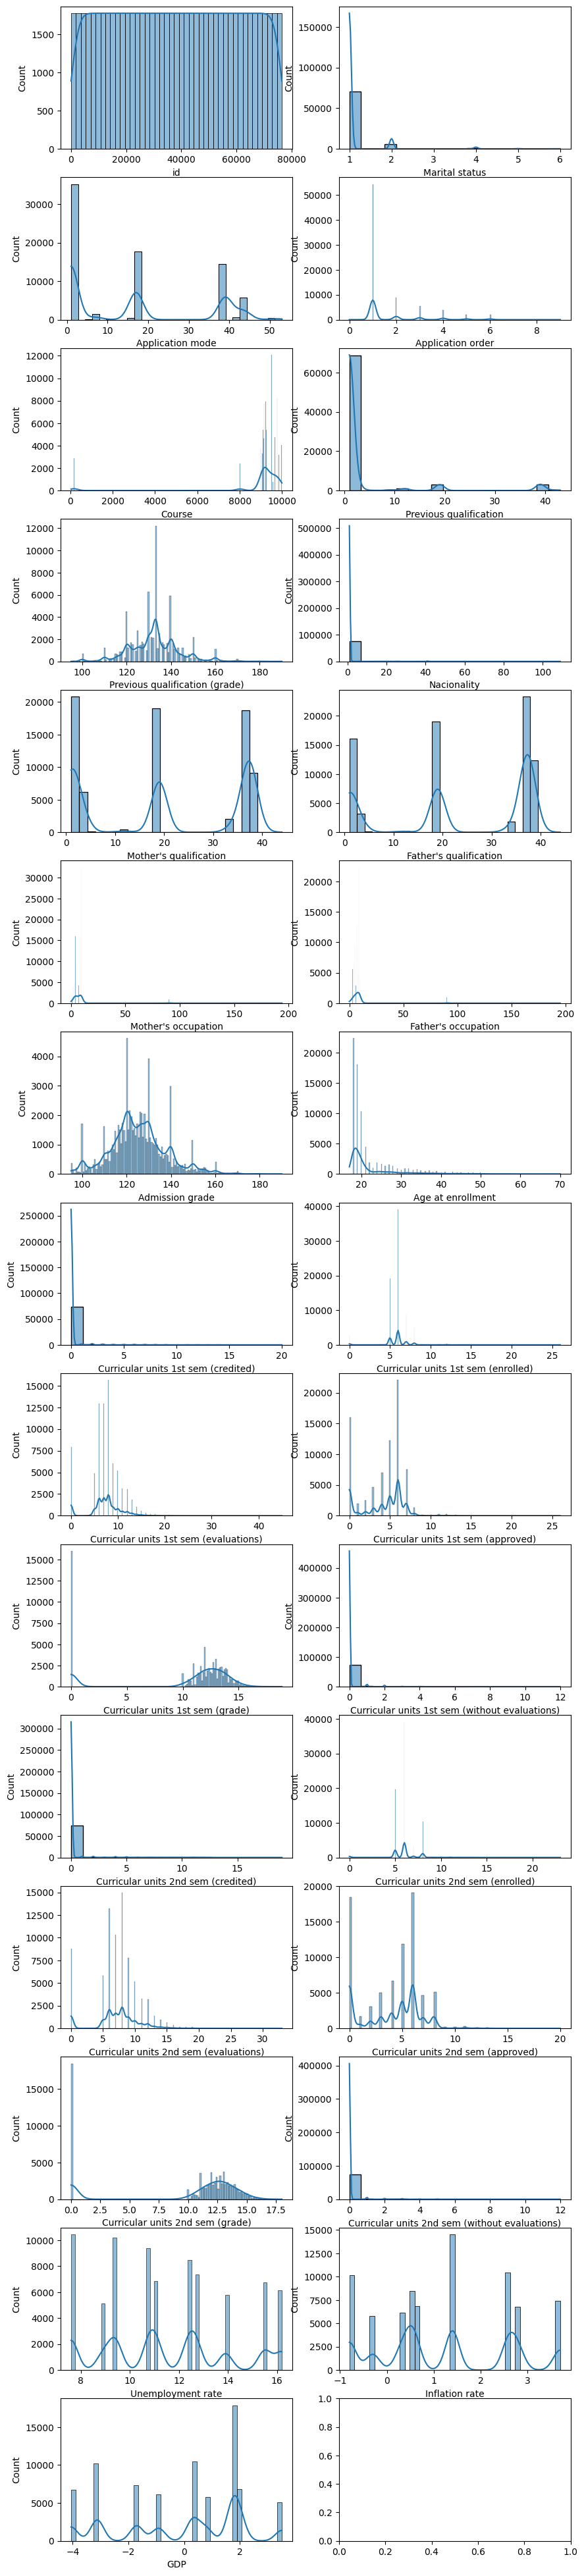

In [8]:
fig,axs=plt.subplots(15, 2, figsize=(10, 10*5))
ax=axs.flatten()
for i,col in enumerate(COL_VISUALS):
    sns.histplot(x=X[col],kde=True,ax=ax[i])
plt.tight_layout

In [9]:
df_train.head(10)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
5,5,1,39,1,171,1,19,133.1,1,19,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,Dropout
6,6,1,44,1,9085,1,39,130.0,1,37,...,0,5,8,5,13.250000,0,12.4,0.5,1.79,Graduate
7,7,1,1,1,9773,1,1,130.0,1,19,...,0,6,6,6,13.666667,0,10.8,1.4,1.74,Graduate
8,8,1,39,1,9003,1,1,133.1,1,19,...,0,6,10,0,0.000000,0,16.2,0.3,-0.92,Dropout
9,9,1,1,6,9500,1,1,135.0,1,37,...,0,7,7,6,12.966667,0,7.6,2.6,0.32,Graduate


<Axes: >

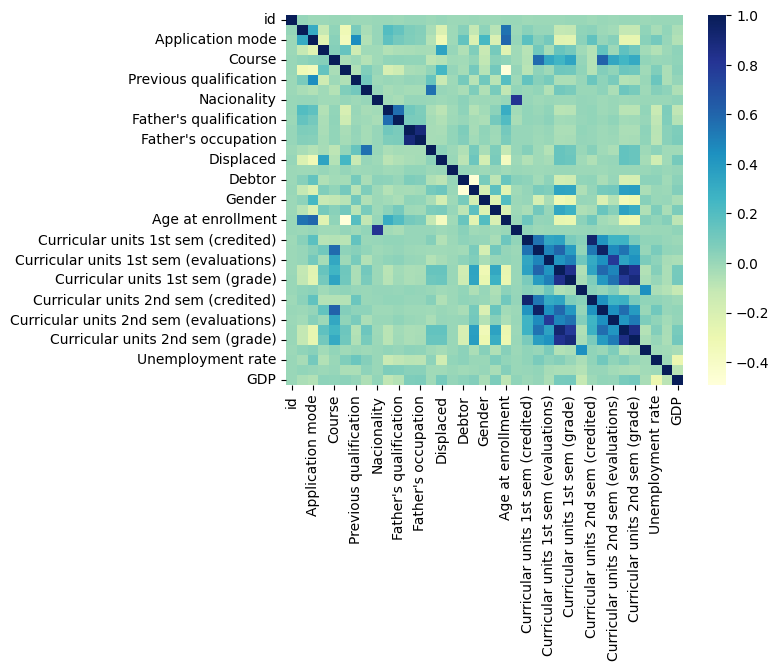

In [10]:
plt.plot(figsize=(10,20))
sns.heatmap(X.corr(), cmap="YlGnBu") 